# **Luis Arraez - 2022 vs 2023 season**


Vertical Approach Angle calculation (VAA):

**vy_f** = -sqrt(vy0² – (2 * ay * (y0 – yf))), 
**t** = (vy_f – vy0) / ay, 
**vz_f** = vz0 + (az * t), 
**VAA** = -arctan(vz_f/vy_f) * (180 / pi)

----

### **Statcast** ([CSV Documentation](https://baseballsavant.mlb.com/csv-docs))

- vy0 = The velocity of the pitch, in feet per second, in y-dimension*, determined at y=50 feet. (*toward home plate)
- ay = The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.
- y0 = 50 (“y=50 feet”).
- yf = 17/12 (home plate, converted to inches).
- vz0 = The velocity of the pitch, in feet per second, in z-dimension**, determined at y=50 feet. (**vertically)
- az = The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import seaborn as sns
import numpy as np
from math import sqrt, atan, degrees

# **2022 season**

In [49]:
mlb_2022 = pd.read_csv('arraez-2023-last.csv')
mlb_2022['pitch_name'] = mlb_2022['pitch_name'].str.replace('4-Seam Fastball', 'Four-Seam')


#def gravity_adjustment(speed):
    #return (523 / speed) ** 2

#def calculate_ivb(pfx_z_inches, release_speed):
    # Calcular el ajuste por gravedad en pulgadas
    #gravity_adjustment_inches = gravity_adjustment(release_speed)
    # Calcular el movimiento vertical inducido (iVB)
    #ivb = gravity_adjustment_inches - pfx_z_inches 
    #return ivb

#mlb_2022['ivb'] = mlb_2022.apply(lambda row: calculate_ivb(row['pfx_z_inches'], row['release_speed']), axis=1)

# Guardar el DataFrame actualizado en un nuevo archivo CSV
#mlb_2022.to_csv('your_file_with_ivb.csv', index=False)

# Mostrar el DataFrame actualizado
mlb_2022.head()



,pitch_name,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,count,pfx_z_inches,pfx_x_inches
0,Sinker,2023-09-29,97.6,-1.42,5.69,"Arraez, Luis",650333,681882,single,hit_into_play,...,0,3,Standard,Standard,213.0,-0.045,0.601,0-2,9.84,14.64
1,Slider,2023-09-29,88.5,-1.68,5.90,"Arraez, Luis",650333,681882,NaN,foul,...,0,3,Standard,Standard,122.0,0.000,-0.062,0-1,3.48,-5.04
2,Sinker,2023-09-29,97.4,-1.25,5.77,"Arraez, Luis",650333,681882,NaN,swinging_strike,...,0,3,Standard,Standard,209.0,0.000,-0.050,0-0,10.68,14.52
3,Changeup,2023-09-23,84.3,-1.38,5.72,"Arraez, Luis",650333,605540,field_out,hit_into_play,...,4,0,Standard,Strategic,222.0,-0.012,-0.311,0-1,7.80,16.08
4,Sinker,2023-09-23,94.6,-1.33,5.80,"Arraez, Luis",650333,605540,NaN,called_strike,...,4,0,Standard,Strategic,211.0,0.000,-0.043,0-0,12.96,13.92


In [50]:
fastballs = ['Four-Seam', 'Sinker', 'Cutter']
breaking_balls = ['Curveball', 'Knuckle Curve', 'Slider', 'Sweeper', 'Slurve', 'Knuckleball']
offspeed_balls = ['Changeup', 'Split-Finger', 'Forkball', 'Screwball']

mlb_2022['pitch_type_group'] = np.where(mlb_2022['pitch_name'].isin(fastballs), 'Fastballs', 
                                    np.where(mlb_2022['pitch_name'].isin(breaking_balls), 'Breaking ball', 
                                             np.where(mlb_2022['pitch_name'].isin(offspeed_balls), 'Offspeed', 'Other')))

# Filtrar los lanzamientos no categorizados
data = mlb_2022[mlb_2022['pitch_type_group'] != 'Other']

pitch_count_by_type = data['pitch_type_group'].value_counts()
# Mostrar los resultados
print(pitch_count_by_type)

pitch_type_group
Fastballs        1389
Breaking ball     498
Offspeed          272
Name: count, dtype: int64


In [51]:
fastballs_data = mlb_2022[mlb_2022['pitch_name'].isin(fastballs)]
#fastballs_data['pfx_z_inches'] = fastballs_data['pfx_z'] * 12
#fastballs_data['pfx_x_inches'] = fastballs_data['pfx_x'] * -12



# Definir la posición vertical final en pulgadas
yf_inches = 17 / 12  # Convertir a pulgadas (1 pie = 12 pulgadas)

# Calcular el ángulo de aproximación vertical (VAA) para cada fila en el DataFrame
def calcular_vaa(row):
    vy0 = row['vy0']  # Velocidad vertical inicial
    vz0 = row['vz0']  # Velocidad vertical inicial
    ay = row['ay']  # Aceleración vertical
    az = row['az']  # Aceleración vertical
    vy_f = -sqrt(vy0**2 - 2 * ay * (50 - yf_inches))  # Velocidad vertical final
    t = (vy_f - vy0) / ay  # Tiempo de vuelo
    vz_f = vz0 + (az * t)  # Velocidad vertical final
    VAA = -degrees(atan(vz_f / vy_f))  # Ángulo de aproximación vertical en grados
    return VAA

def calcular_haa(row):
    vx0 = row['vx0']  # Velocidad horizontal inicial
    vy0 = row['vy0']  # Velocidad vertical inicial
    ax = row['ax']  # Aceleración horizontal
    ay = row['ay']  # Aceleración vertical
    vy_f = -sqrt(vy0**2 - 2 * ay * (50 - yf_inches))  # Velocidad vertical final (ya calculada en VAA)
    t = (vy_f - vy0) / ay  # Tiempo de vuelo (ya calculado en VAA)
    vx_f = vx0 + (ax * t)  # Velocidad horizontal final
    HAA = -degrees(atan(vx_f / vy_f))  # Ángulo de aproximación horizontal en grados
    return HAA

# Aplicar la función calcular_vaa a cada fila del DataFrame
fastballs_data['Vertical Approach Angle'] = fastballs_data.apply(calcular_vaa, axis=1)
fastballs_data['Horizontal Approach Angle'] = fastballs_data.apply(calcular_haa, axis=1)
# Mostrar los resultados agrupados por tipo de lanzamiento
print("Resumen de Vertical Approach Angle para cada tipo de Fastball:")
print(fastballs_data.groupby('pitch_name')['Vertical Approach Angle'].mean())

Resumen de Vertical Approach Angle para cada tipo de Fastball:
pitch_name
Cutter      -6.060756
Four-Seam   -4.923212
Sinker      -5.935726
Name: Vertical Approach Angle, dtype: float64


C:\Users\sedem\AppData\Local\Temp\ipykernel_6872\165317346.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['Vertical Approach Angle'] = fastballs_data.apply(calcular_vaa, axis=1)
C:\Users\sedem\AppData\Local\Temp\ipykernel_6872\165317346.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['Horizontal Approach Angle'] = fastballs_data.apply(calcular_haa, axis=1)


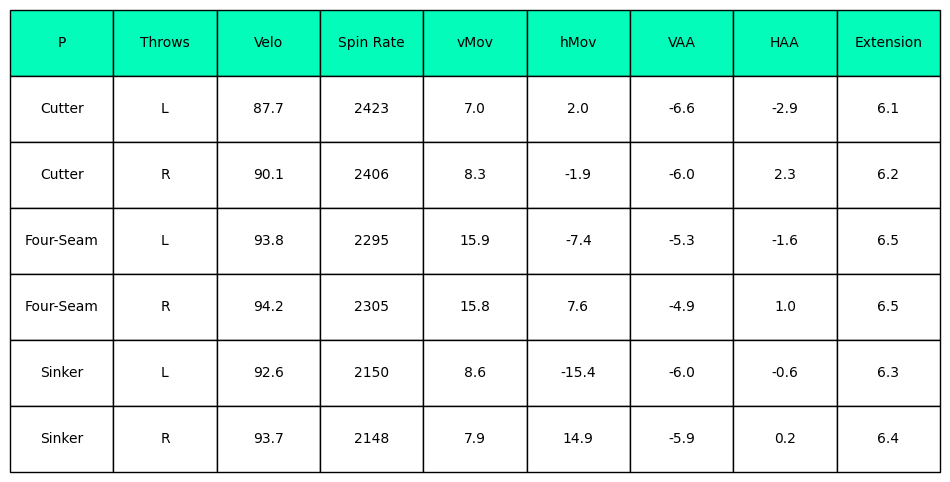

In [52]:

summary_table = fastballs_data.groupby(['pitch_name', 'p_throws']).agg({
    'release_speed': lambda x: round(np.mean(x), 1),
    'release_spin_rate': lambda x: int(np.mean(x)),
    'pfx_z_inches': lambda x: round(np.mean(x), 1),
    'pfx_x_inches': lambda x: round(np.mean(x), 1),
    #'spin_axis': lambda x: round(np.mean(x), 1),
    'Vertical Approach Angle': lambda x: round(np.mean(x), 1),
    'Horizontal Approach Angle': lambda x: round(np.mean(x), 1),
    #'effective_speed': lambda x: round(np.mean(x), 1),
    'release_extension': lambda x: round(np.mean(x), 1)
}).reset_index()

summary_table.columns = ['P', 'Throws', 'Velo', 'Spin Rate', 'vMov', 'hMov', 'VAA', 'HAA' , 'Extension']

fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar el tamaño de la imagen según sea necesario
ax.axis('off')

# Crear una tabla en matplotlib
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Añadir las cabeceras
ncols = summary_table.shape[1]
nrows = summary_table.shape[0] + 1

# Ajustar el tamaño de las celdas
width, height = 50 / ncols, 1.0 / nrows

fontsize = 45
fontweight = 'bold'

# Añadir las cabeceras
for i, column in enumerate(summary_table.columns):
    tbl.add_cell(0, i, width, height, text=column, loc='center', facecolor='#03fcba')

# Añadir las filas
for row_idx, row in summary_table.iterrows():
    for col_idx, value in enumerate(row):
        tbl.add_cell(row_idx + 1, col_idx, width, height, text=value, loc='center', facecolor='white')

ax.add_table(tbl)

# Guardar la imagen
#plt.savefig('/mnt/data/summary_table.png', bbox_inches='tight', dpi=300)

# Mostrar la imagen
plt.show()

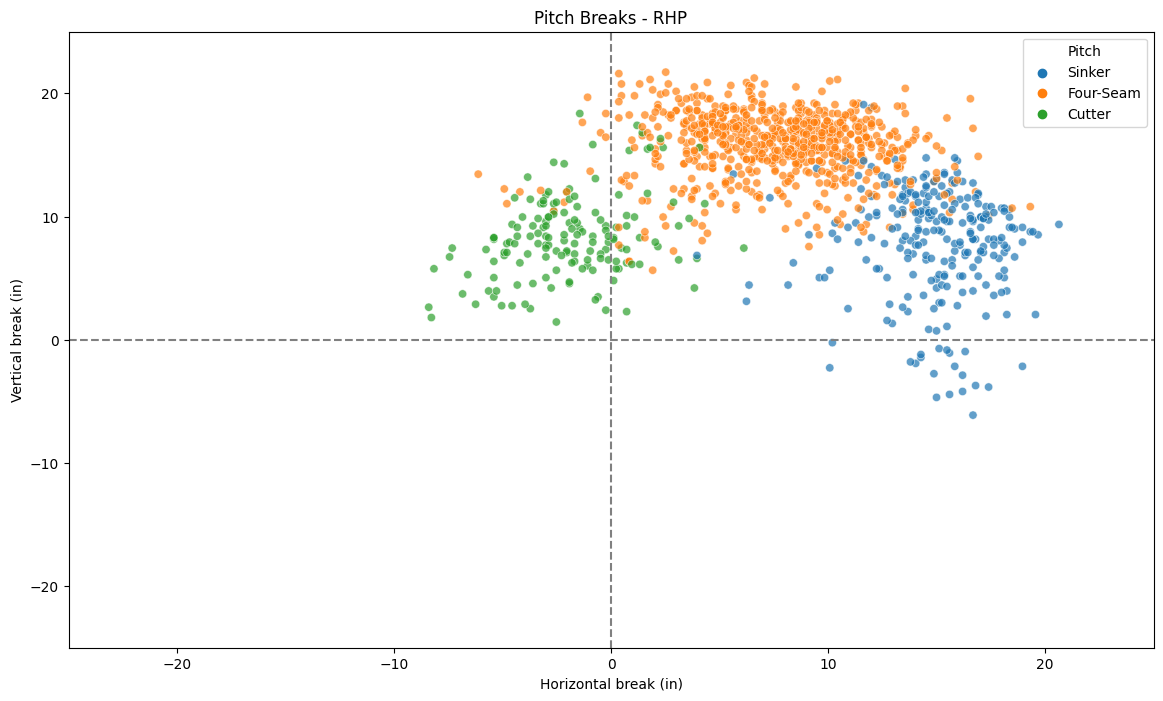

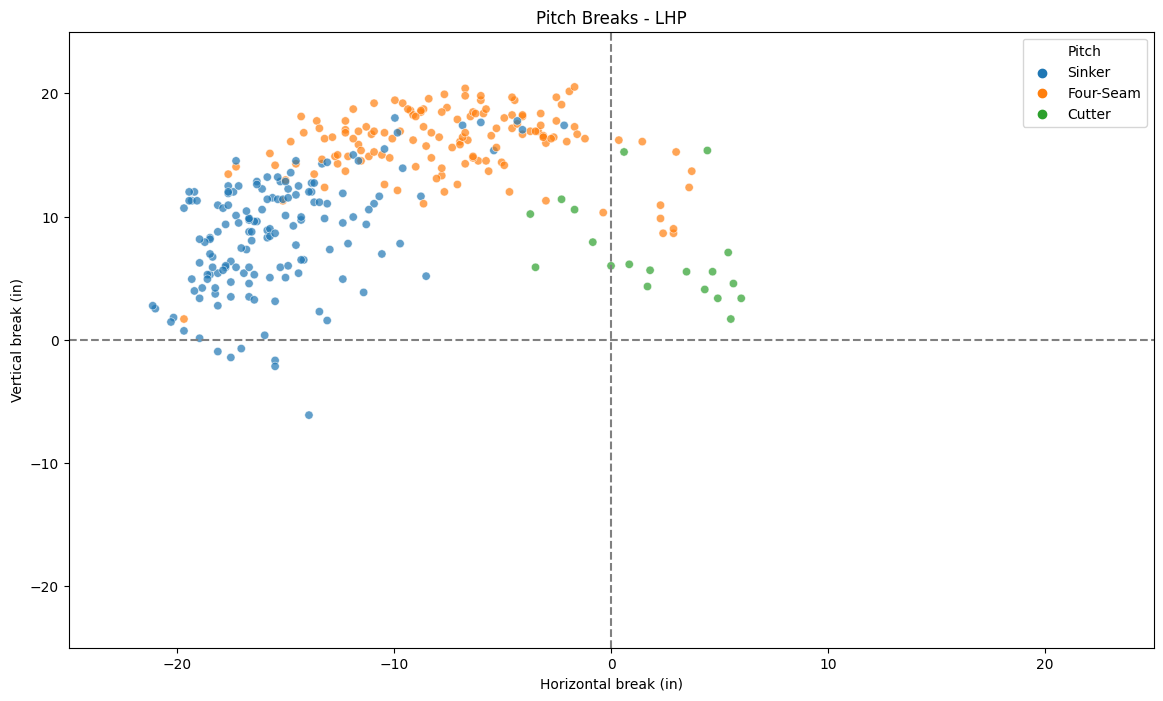

In [53]:

# Separar los datos por lanzadores diestros (R) y zurdos (L)
fastballs_data_R = fastballs_data[fastballs_data['p_throws'] == 'R']
fastballs_data_L = fastballs_data[fastballs_data['p_throws'] == 'L']

# Colores vivos para los tipos de lanzamiento
#pitch_palette = {'Four-Seam': 'red', 'Sinker': 'blue', 'Cutter': 'green'}

# Graficar para lanzadores diestros (R)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=fastballs_data_R, x='pfx_x_inches', y='pfx_z_inches', hue='pitch_name', alpha=0.7)
plt.title('Pitch Breaks - RHP')
plt.xlabel('Horizontal break (in)')
plt.ylabel('Vertical break (in)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-25, 25)  # Establecer límites personalizados para el eje x
plt.ylim(-25, 25)  # Establecer límites personalizados para el eje y
plt.legend(title='Pitch')
plt.show()

# Graficar para lanzadores zurdos (L)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=fastballs_data_L, x='pfx_x_inches', y='pfx_z_inches', hue='pitch_name', alpha=0.7)
plt.title('Pitch Breaks - LHP')
plt.xlabel('Horizontal break (in)')
plt.ylabel('Vertical break (in)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-25, 25)  # Establecer límites personalizados para el eje x
plt.ylim(-25, 25)  # Establecer límites personalizados para el eje y
plt.legend(title='Pitch')
plt.show()

C:\Users\sedem\AppData\Local\Temp\ipykernel_6872\498861494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['attack_zone'] = 'Waste'


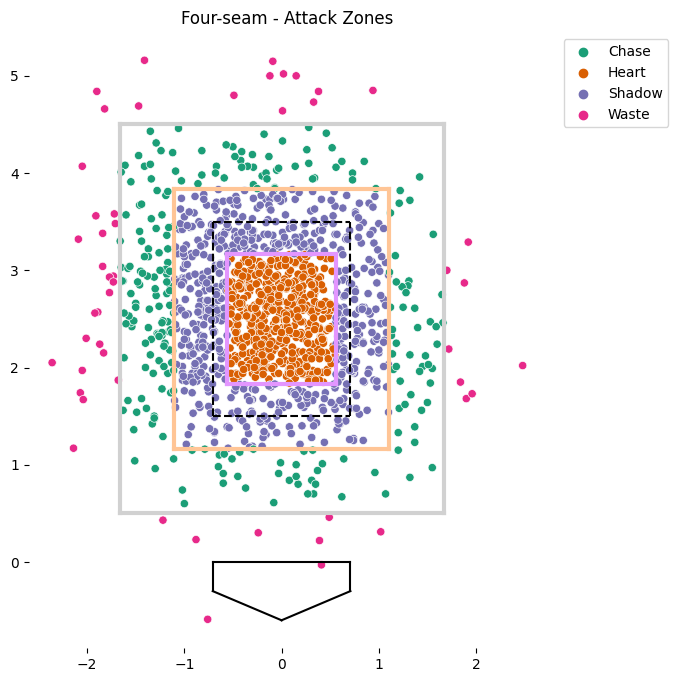

In [74]:
fastballs_data = mlb_2022[mlb_2022['pitch_name'].isin(fastballs)]

fastballs_data['attack_zone'] = 'Waste'
fastballs_data.loc[(fastballs_data['plate_x'].between(-0.558, 0.558)) & (fastballs_data['plate_z'].between(1.833,3.166)), 'attack_zone'] = 'Heart'
fastballs_data.loc[(fastballs_data['plate_x'].between(-1.108, 1.108)) & (fastballs_data['plate_z'].between(1.166,3.833)) & (~fastballs_data['attack_zone'].isin(['Heart'])), 'attack_zone'] = 'Shadow'
fastballs_data.loc[(fastballs_data['plate_x'].between(-1.666, 1.666)) & (fastballs_data['plate_z'].between(0.5,4.5)) & (~fastballs_data['attack_zone'].isin(['Heart', 'Shadow'])), 'attack_zone'] = 'Chase'



fig = plt.figure(figsize=(8,8))
fig = sns.scatterplot(data=fastballs_data, x='plate_x', y='plate_z', 
                      hue='attack_zone', palette='Dark2')
draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.title('Four-seam - Attack Zones')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.show()